In [57]:
%reset -f

## Assignment E - Brightfield histology color deconvolution
- Author: Catherine Chia and Aoming Sun
- Teacher and TAs: Marten Postma, Aaron Lin, Aoming Sun, Catherine Chia
- Date: 21st June, 2023

### Outline of workflow
1. Prerequisites: 
- Use ImageJ to crop and export images: Stain 1, Stain 2, Background, __OR__ 
- Use ImageJ to export the RGB vectors for the same images

2. Preprocessing

3. Color Deconvolution

4. Separate stains

In [58]:
#Libraries
from matplotlib import pyplot as plt, patches
import numpy as np

#Enable nice output printing features
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last_expr_or_assign'
import warnings
warnings.filterwarnings('ignore')

#Add other libraries as you see fit
import glob
from skimage import io

### __Preprocessing steps__

In [59]:
#Start coding here

#Import IHC image and split it to RGB
img_ihc = io.imread('IPQDA_23_ASS_E_DATA/H_E.tif')
img_ihc_red = img_ihc[:, :, 0]
img_ihc_green = img_ihc[:, :, 1]
img_ihc_blue = img_ihc[:, :, 2]

#Import cropped stain1, stain2 and background ROI images, OR import RGB vectors of the ROIs
img_eosin = io.imread('IPQDA_23_ASS_E_DATA/eosin.tif')
img_hematoxylin = io.imread('IPQDA_23_ASS_E_DATA/hematoxylin.tif')
img_background = io.imread('IPQDA_23_ASS_E_DATA/background.tif')

#End coding here

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


array([[[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [253, 253, 253],
        [254, 254, 254],
        [254, 254, 254]],

       [[251, 251, 251],
        [251, 251, 251],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [248, 248, 248],
        [249, 249, 249],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       ...,

       [[252, 252, 252],
        [252, 252, 252],
        [253, 253, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[249, 249, 249],
        [249, 249, 249],
        [250, 250, 250],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

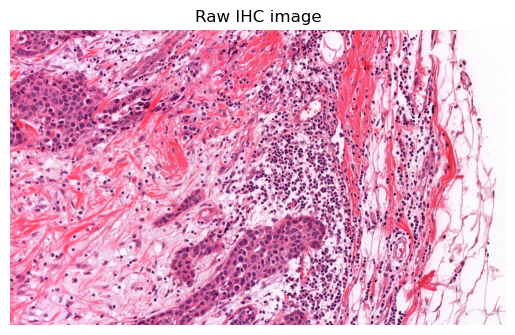

In [60]:
#Inspect imported IHC image
plt.title("Raw IHC image")
plt.axis('off')
plt.imshow(img_ihc)

### Calculate RGB mean of the images

In [61]:
#Start coding here

#Calculate mean of image for each RGB channels. If you use RGB vectors, assign them directly to the variables here
mean_img_stain1 = np.mean(img_eosin, axis=(0, 1))
mean_img_stain2 = np.mean(img_hematoxylin, axis=(0, 1))
mean_img_background = np.mean(img_background, axis=(0, 1))

#End coding here

print(mean_img_stain1)
print(mean_img_stain2)
print(mean_img_background)

[250.25185185  76.92407407 114.75925926]
[73.24444444 17.88888889 83.01111111]
[253.04947653 252.99819881 253.87267815]


### Inspect ROIs of stains and background to ensure correct stain color selection

#fa4c72
#491153
#fdfcfd


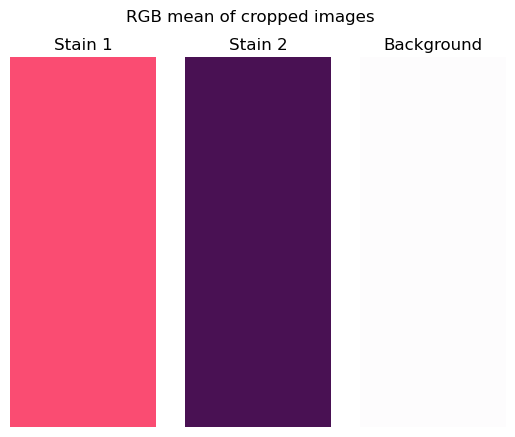

In [62]:
#Convert RGB values to Hex color values for visualization
hex_img_stain1 = '#%02x%02x%02x' % tuple(mean_img_stain1.astype(int))
hex_img_stain2 = '#%02x%02x%02x' % tuple(mean_img_stain2.astype(int))
hex_img_background = '#%02x%02x%02x' % tuple(mean_img_background.astype(int))

print(hex_img_stain1)
print(hex_img_stain2)
print(hex_img_background)

#Visualization of RGB mean of cropped images
fig, axs = plt.subplots(1,3)

fig.suptitle('RGB mean of cropped images')

rectangle_stain1 = patches.Rectangle((0, 0), 1, 1, facecolor=hex_img_stain1)
rectangle_stain2 = patches.Rectangle((0, 0), 1, 1, facecolor=hex_img_stain2)
rectangle_background = patches.Rectangle((0, 0), 1, 1, facecolor=hex_img_background)

axs[0].add_patch(rectangle_stain1)
axs[1].add_patch(rectangle_stain2)
axs[2].add_patch(rectangle_background)
axs[0].set_title('Stain 1')
axs[1].set_title('Stain 2')
axs[2].set_title('Background')

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
plt.show()

### __Color Deconvolution__

### Calculate transmittance, T and convert it to absorbances, OD according to Beer–Lambert law  

In [63]:
#Calculate transmittances, T for each stain
T_stain1 = mean_img_background / mean_img_stain1
T_stain2 = mean_img_background / mean_img_stain2
OD_stain1 = np.log10(T_stain1)
OD_stain2 = np.log10(T_stain2)

print(OD_stain1)
print(OD_stain2)

[0.00482814 0.51705515 0.34482823]
[0.53843075 1.15053406 0.48547974]


### Normalize the absorbances to vector lengths

In [64]:
#Start coding here

# Normalize the absorbances
OD_stain1_norm = OD_stain1 / np.max(OD_stain1)
OD_stain2_norm = OD_stain2 / np.max(OD_stain2)

#End coding here

print(OD_stain1_norm)
print(OD_stain2_norm)

[0.00933777 1.         0.66690802]
[0.46798332 1.         0.42196033]


### Form a deconvolution matrix

In [65]:
#Start coding here

#Combine OD_stain1_norm and OD_stain2_norm to form a normalized OD matrix M
M = np.column_stack((OD_stain1_norm, OD_stain2_norm))

#Calculate the deconvolution matrix according to Linear regression
MT = np.linalg.pinv(M)
MT_M = np.dot(MT, M)
inversed_MT_M = np.linalg.inv(MT_M)
D = np.dot(inversed_MT_M, MT)

#End coding here

print("M")
print(M)
print("M transposed")
print(MT)
print("Inversed M transposed multiplied with M")
print(inversed_MT_M)
print("Deconvolution matrix, D")
print(D)

M
[[0.00933777 0.46798332]
 [1.         1.        ]
 [0.66690802 0.42196033]]
M transposed
[[-1.61140811  0.30461144  1.06526762]
 [ 1.81803176  0.43544127 -0.67838087]]
Inversed M transposed multiplied with M
[[ 1.00000000e+00 -6.66133815e-16]
 [ 2.22044605e-16  1.00000000e+00]]
Deconvolution matrix, D
[[-1.61140811  0.30461144  1.06526762]
 [ 1.81803176  0.43544127 -0.67838087]]


### Calculate the coefficient for each stain 

In [66]:
#Convert pixel intensity to transmittance to absorbance according to Beer-Lambert Law on the IHC image
#Calculate the transmittance
T_img_ihc = mean_img_background / img_ihc


#Because of the logarithmic function in the next step, we assign all transmittance value less than 1 to 1 
T_img_ihc[T_img_ihc<1] = 1

In [67]:
#Start coding here

#Calculate the absorbance
OD_img_ihc = -np.log10(T_img_ihc)

#Coefficient matrix
coeffs = np.dot(np.reshape(OD_img_ihc, (-1, 3)), D.T)
coeff_stain1 = coeffs[:, 0]
coeff_stain2 = coeffs[:, 1]


#Extracting the individual coefficients from the coefficient matrix
#Which are essentially the orthogonal representation of the stains of the IHC image
OD_img_ihc_stain1 = np.reshape(coeff_stain1, img_ihc_red.shape)[:, :, np.newaxis] * OD_stain1
OD_img_ihc_stain2 = np.reshape(coeff_stain2, img_ihc_red.shape)[:, :, np.newaxis] * OD_stain2


#End coding here

print(coeff_stain1.shape)
print(coeff_stain2.shape)

(8951993,)
(8951993,)


### __Separate stains__

### Multiply the coefficients with the stain absorbance to get the image absorbance per stain

In [68]:
#Initialize the image absorbance container per stain
OD_img_ihc_stain1 = np.zeros((img_ihc.shape[0], img_ihc.shape[1], img_ihc.shape[2]))
OD_img_ihc_stain2 = np.zeros((img_ihc.shape[0], img_ihc.shape[1], img_ihc.shape[2]))


#Start coding here

#Multiply the coefficients with the stain absorbance per stain. Do it independently for each RGB layer
OD_img_ihc_stain1 = np.reshape(coeff_stain1, img_ihc_red.shape)[:, :, np.newaxis] * OD_stain1
OD_img_ihc_stain2 = np.reshape(coeff_stain2, img_ihc_red.shape)[:, :, np.newaxis] * OD_stain2


#End coding here

array([[[-0.03815978, -0.0815409 , -0.03440702],
        [-0.03527395, -0.07537437, -0.031805  ],
        [-0.02566785, -0.0548478 , -0.02314359],
        ...,
        [-0.00089052, -0.0019029 , -0.00080295],
        [-0.00540587, -0.01155142, -0.00487424],
        [-0.00089052, -0.0019029 , -0.00080295]],

       [[-0.06844763, -0.14626083, -0.06171627],
        [-0.04869316, -0.10404891, -0.04390451],
        [-0.02672535, -0.05710748, -0.02409709],
        ...,
        [-0.00162198, -0.00346589, -0.00146247],
        [-0.00390466, -0.00834358, -0.00352066],
        [-0.00080739, -0.00172526, -0.00072799]],

       [[-0.0703252 , -0.15027288, -0.0634092 ],
        [-0.04892904, -0.10455295, -0.0441172 ],
        [-0.02999281, -0.06408948, -0.02704322],
        ...,
        [-0.00162198, -0.00346589, -0.00146247],
        [-0.00211486, -0.00451909, -0.00190687],
        [-0.00211486, -0.00451909, -0.00190687]],

       ...,

       [[-0.01190836, -0.02544613, -0.01073726],
        [-0

### Convert the image absorbance to image transmittance  

In [69]:
#Convert absorbance to transmittance
T_img_ihc_stain1 = 10 ** (-OD_img_ihc_stain1)
T_img_ihc_stain2 = 10 ** (-OD_img_ihc_stain2)

array([[[1.09184196, 1.20653771, 1.08244796],
        [1.08461086, 1.18952719, 1.07598197],
        [1.06088389, 1.13461311, 1.05473557],
        ...,
        [1.00205261, 1.00439119, 1.00185056],
        [1.01252527, 1.02695502, 1.01128657],
        [1.00205261, 1.00439119, 1.00185056]],

       [[1.17070542, 1.40042815, 1.15269994],
        [1.11864724, 1.27071722, 1.10638051],
        [1.06347025, 1.140532  , 1.05705379],
        ...,
        [1.00374173, 1.00801244, 1.00337313],
        [1.00903134, 1.01939754, 1.00813957],
        [1.00186082, 1.00398047, 1.00167767]],

       [[1.17577766, 1.41342537, 1.15720205],
        [1.11925498, 1.27219284, 1.10692245],
        [1.07150157, 1.15901614, 1.06424893],
        ...,
        [1.00374173, 1.00801244, 1.00337313],
        [1.00488151, 1.01045991, 1.0044004 ],
        [1.00488151, 1.01045991, 1.0044004 ]],

       ...,

       [[1.02779941, 1.06034241, 1.02503161],
        [1.03099468, 1.06739879, 1.02790445],
        [1.02646982, 1

### Clip each layer in the image transmittance to values between 0 and 1, preparing for conversion to values between 0 and 255 later

In [70]:
#Clip each layer to 0,1
T_img_ihc_stain1[T_img_ihc_stain1 > 1] = 1
T_img_ihc_stain2[T_img_ihc_stain2 > 1] = 1
T_img_ihc_stain1[T_img_ihc_stain1 < 0] = 0
T_img_ihc_stain2[T_img_ihc_stain2 < 0] = 0

### Convert the image transmittance to values between 0 and 255 (integers), so that plotting is possible

In [71]:
#Start coding here

T_img_ihc_stain1_norm = (T_img_ihc_stain1 * 255).astype(np.uint8)

T_img_ihc_stain2_norm = (T_img_ihc_stain2 * 255).astype(np.uint8)

#End coding here


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

### Visualize deconvolved images

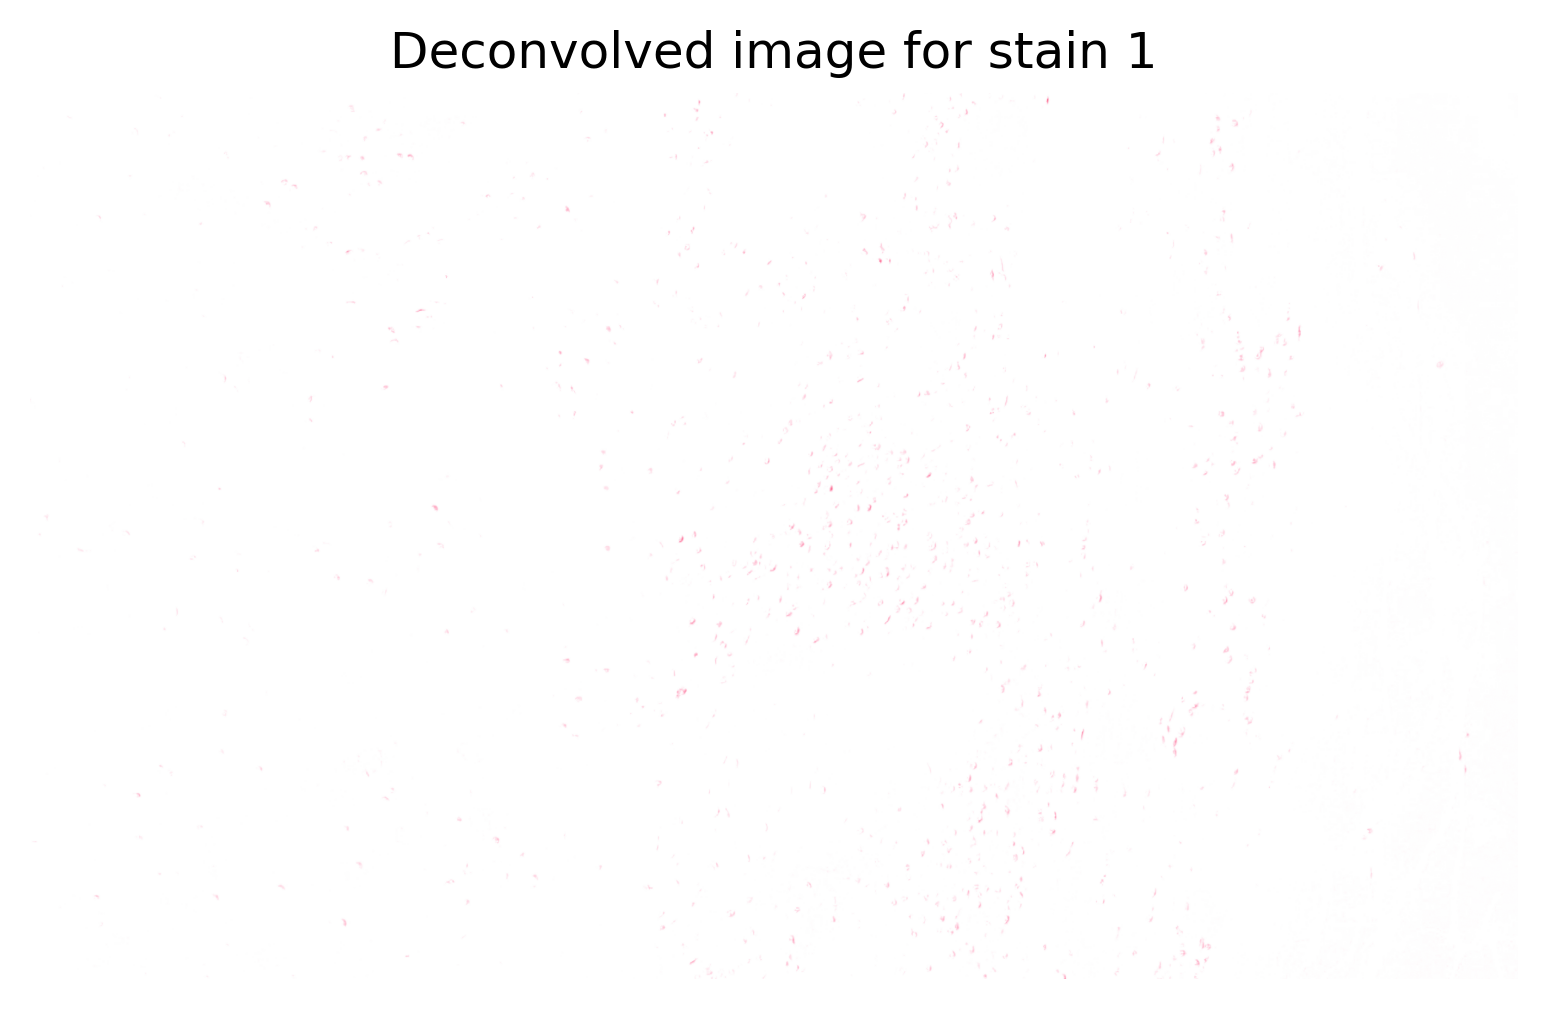

In [72]:
#Display deconvolved image for stain 1
fig = plt.figure(dpi=300)
plt.title("Deconvolved image for stain 1")
plt.axis('off')
plt.imshow(T_img_ihc_stain1_norm)
fig.savefig('T_img_ihc_stain1_norm.tif')

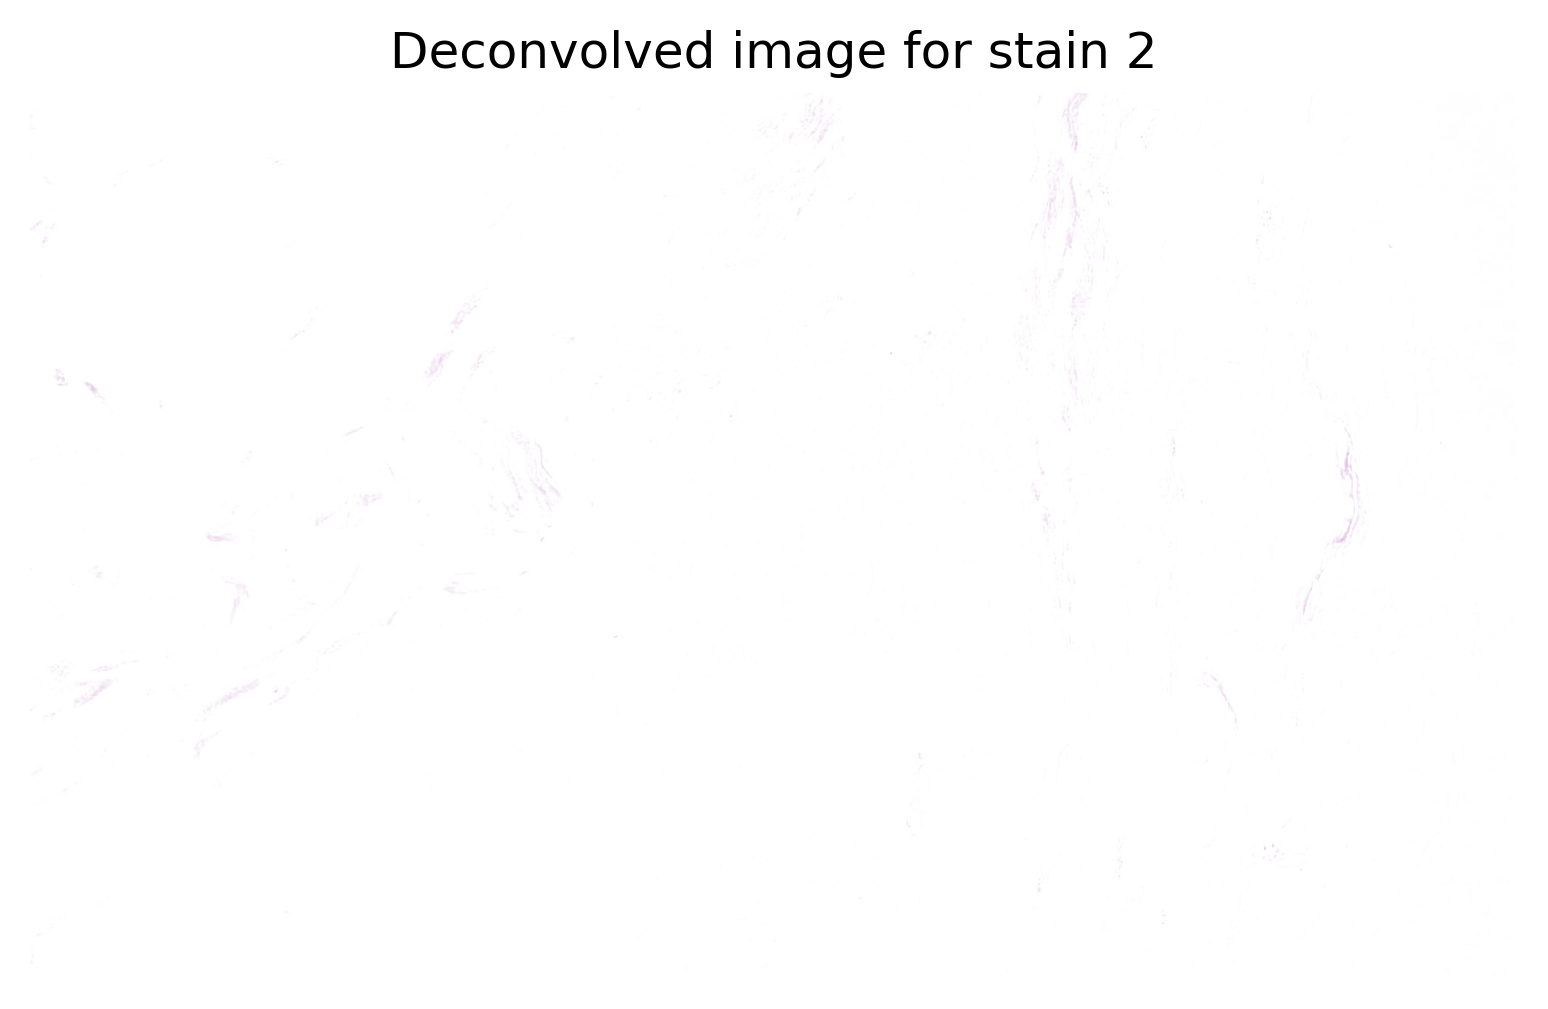

In [73]:
#Display and export deconvolved image for stain 2
fig = plt.figure(dpi=300)
plt.title("Deconvolved image for stain 2")
plt.axis('off')
plt.imshow(T_img_ihc_stain2_norm)
fig.savefig('T_img_ihc_stain2_norm.tif')

In [74]:
print("Coefficients for stain 1:", coeff_stain1)
print("Coefficients for stain 2:", coeff_stain2)

Coefficients for stain 1: [-0.38955527 -0.37143027 -0.3520026  ...  0.00637744  0.00411394
  0.00185944]
Coefficients for stain 2: [-0.07087222 -0.06551251 -0.0476716  ... -0.01258515 -0.00867524
 -0.0047809 ]
